In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
import ffmpeg


In [45]:
all_envs = gym.envs.registry.keys()
print(sorted(all_envs))

['Acrobot-v1', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Ant-v5', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'Blackjack-v1', 'CarRacing-v3', 'CartPole-v0', 'CartPole-v1', 'CliffWalking-v0', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'GymV21Environment-v0', 'GymV26Environment-v0', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'HalfCheetah-v5', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Hopper-v5', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'Humanoid-v5', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'HumanoidStandup-v5', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedDoublePendulum-v5', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedPendulum-v5', 'LunarLander-v3', 'LunarLanderContinuous-v3', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Pusher-v2', 'Pusher-v4', 'Pusher-v5', 'Reacher-v2', 'Reacher-v4', 'Reacher-v5', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Swimmer-v5', 'Taxi-v3', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Walker2d-v5', 'phys2d/Ca

# graphs for performance of ppo, trpo, a2c

## cartpole: classic control environment

### to run training jobs with checkpoints

Example for PPO:
- ```python train.py --algo ppo --env CartPole-v1 --n-timesteps 100000 --save-freq 10000```

To record and save videos of best model, final model, checkpoint models:
- ```python -m rl_zoo3.record_training --algo ppo --env CartPole-v1 -n 1000 -f logs --deterministic```

### Processing data, plotting graphs

In [21]:
def load_and_combine_monitor_files(file_paths):
    # Combine data from multiple monitor.csv files
    combined_data = pd.concat(
        [pd.read_csv(file, skiprows=1) for file in file_paths], ignore_index=True
    )
    return combined_data

# Example: List of monitor files for PPO
ppo_files = [f"./logs/ppo/CartPole-v1_8/{i}.monitor.csv" for i in range(8)]
trpo_files = [f"./logs/trpo/CartPole-v1_7/{i}.monitor.csv" for i in range(8)]
a2c_files = [f"./logs/a2c/CartPole-v1_3/{i}.monitor.csv" for i in range(8)]


In [22]:
# Combine data for each method
ppo_data = load_and_combine_monitor_files(ppo_files)
trpo_data = load_and_combine_monitor_files(trpo_files)
a2c_data = load_and_combine_monitor_files(a2c_files)

In [23]:
def process_monitor_data(data, total_timesteps=100000):
    # Sort by timesteps
    data.sort_values("t", inplace=True)

    # Calculate cumulative timesteps
    data["cumulative_timesteps"] = np.cumsum(data["l"])

    # Filter to only include timesteps <= total_timesteps
    data = data[data["cumulative_timesteps"] <= total_timesteps]

    # Smooth rewards using a rolling mean (optional)
    data["smoothed_reward"] = data["r"].rolling(window=20, min_periods=1).mean()

    return data

# Process each method's data
ppo_processed = process_monitor_data(ppo_data)
trpo_processed = process_monitor_data(trpo_data)
a2c_processed = process_monitor_data(a2c_data)

### plotting rewards over time

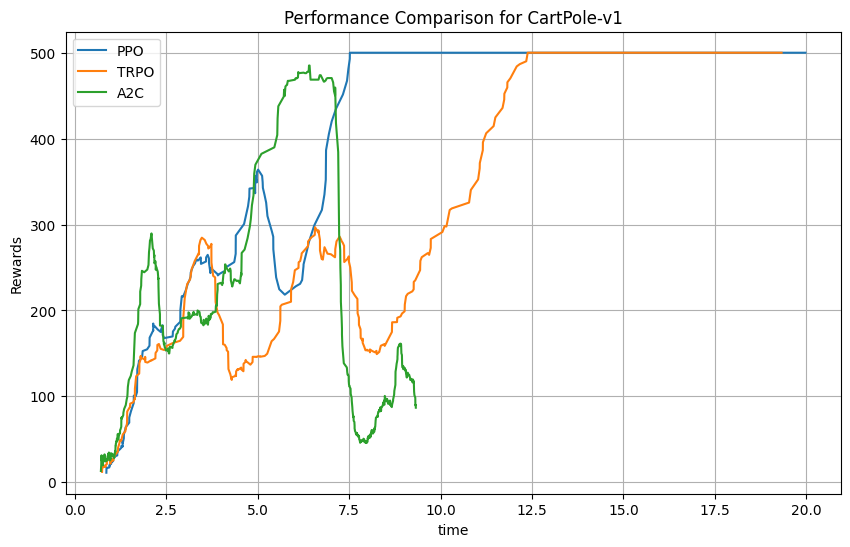

In [ ]:
plt.figure(figsize=(10, 6))

# Plot for PPO
plt.plot(ppo_processed["t"], ppo_processed["smoothed_reward"], label="PPO")

# Plot for TRPO
plt.plot(trpo_processed["t"], trpo_processed["smoothed_reward"], label="TRPO")

# Plot for A2C
plt.plot(a2c_processed["t"], a2c_processed["smoothed_reward"], label="A2C")

# Add labels and legend
plt.xlabel("time")
plt.ylabel("Rewards")
plt.title("Performance Comparison for CartPole-v1")
plt.legend()
plt.grid()
plt.show()

### plotting rewards over timesteps

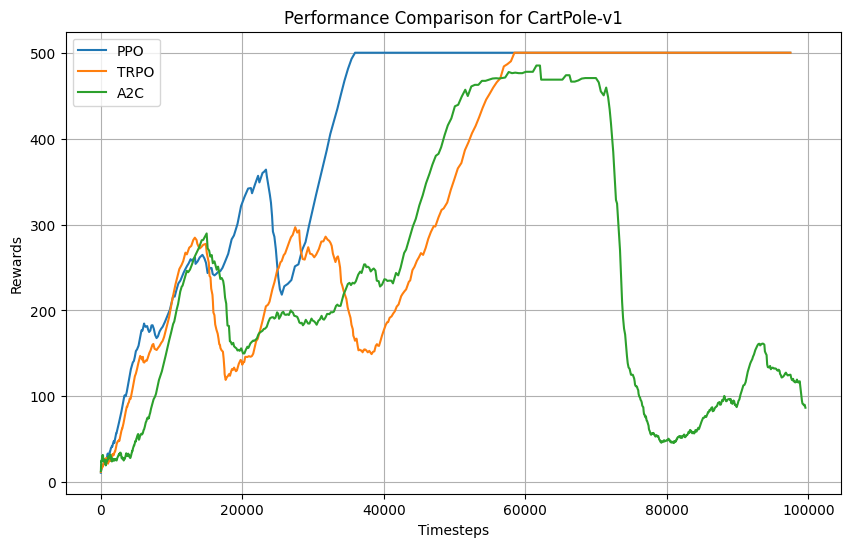

In [25]:
plt.figure(figsize=(10, 6))

# Plot for PPO
plt.plot(ppo_processed["cumulative_timesteps"], ppo_processed["smoothed_reward"], label="PPO")

# Plot for TRPO
plt.plot(trpo_processed["cumulative_timesteps"], trpo_processed["smoothed_reward"], label="TRPO")

# Plot for A2C
plt.plot(a2c_processed["cumulative_timesteps"], a2c_processed["smoothed_reward"], label="A2C")

# Add labels and legend
plt.xlabel("Timesteps")
plt.ylabel("Rewards")
plt.title("Performance Comparison for CartPole-v1")
plt.legend()
plt.grid()
plt.show()

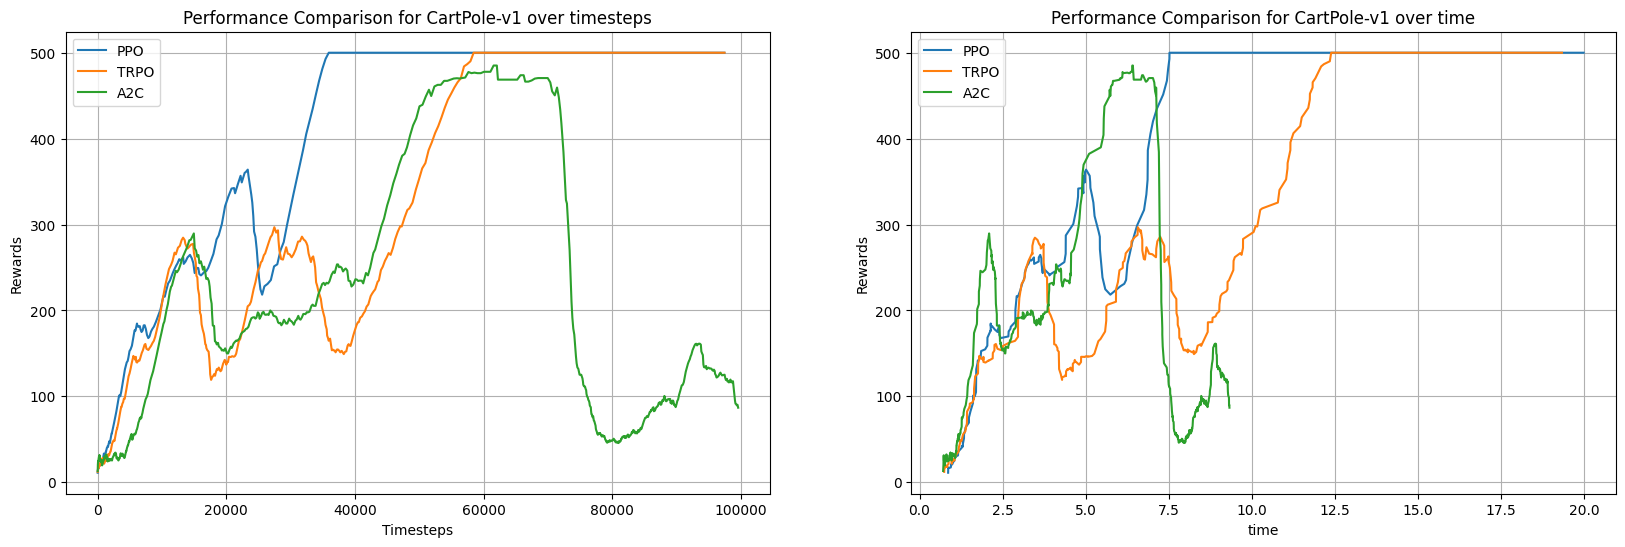

In [29]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(ppo_processed["cumulative_timesteps"], ppo_processed["smoothed_reward"], label="PPO")

# Plot for TRPO
plt.plot(trpo_processed["cumulative_timesteps"], trpo_processed["smoothed_reward"], label="TRPO")

# Plot for A2C
plt.plot(a2c_processed["cumulative_timesteps"], a2c_processed["smoothed_reward"], label="A2C")

# Add labels and legend
plt.xlabel("Timesteps")
plt.ylabel("Rewards")
plt.title("Performance Comparison for CartPole-v1 over timesteps")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(ppo_processed["t"], ppo_processed["smoothed_reward"], label="PPO")

# Plot for TRPO
plt.plot(trpo_processed["t"], trpo_processed["smoothed_reward"], label="TRPO")

# Plot for A2C
plt.plot(a2c_processed["t"], a2c_processed["smoothed_reward"], label="A2C")

# Add labels and legend
plt.xlabel("time")
plt.ylabel("Rewards")
plt.title("Performance Comparison for CartPole-v1 over time")
plt.legend()
plt.grid()

plt.show()

### putting videos for cartpole simulations together

In [17]:
# Define input video paths and their subtitles
path = "logs"
methods = ["ppo", "trpo", "a2c"]
timesteps = [10000, 40000, 70000]
index = [8, 7, 5]
videos = []

for i, method in enumerate(methods):
    for timestep in timesteps:
        video_path = f"{path}/{method}/CartPole-v1_{index[i]}/videos/checkpoint-{timestep}-{method}-CartPole-v1-step-0-to-step-1000.mp4"
        subtitle = f"{method.upper()}, {timestep // 1_000}k"
        # print(video_path, "\n", subtitle)
        videos.append({"path" : video_path, "subtitle": subtitle})



In [ ]:
output_videos = []
for i, video in enumerate(videos):
    output_path = f"temp_with_subtitle_{i + 1}.mp4"
    # Add subtitles to each video
    video_with_subtitle = ffmpeg.input(video["path"]).filter(
        "drawtext",
        text=video["subtitle"],
        fontfile="/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf",  # Adjust to your system's font file path
        fontsize=30,
        fontcolor="black",
        x="(w-text_w)/2",
        y="h-50",
        box=1,
        boxcolor="white",
    )
    # Add padding around each video
    padded_video = video_with_subtitle.filter(
        "pad", width="iw+20", height="ih+20", x=10, y=10, color="white"
    ).output(output_path)
    padded_video.run(overwrite_output=True)
    output_videos.append(output_path)

# Arrange videos in a 3x3 grid with spacing accounted for
grid_output = "final_output.mp4"
ffmpeg.filter(
    [ffmpeg.input(v) for v in output_videos], 
    "xstack", 
    inputs=9, 
    layout="0_0|w0_0|w0+w1_0|0_h0|w0_h0|w0+w1_h0|0_h0+h1|w0_h0+h1|w0+w1_h0+h1"
).output(grid_output).run(overwrite_output=True)

# Add an overall title
final_with_title = "final_with_title.mp4"
ffmpeg.input(grid_output).filter(
    "drawtext",
    text="CartPole simulations after 10k, 40k, 70k timesteps",
    fontfile="/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf",
    fontsize=54,
    fontcolor="black",
    x="(w-text_w)/2",
    y="20",
    box=1,
    boxcolor="white",
).output(final_with_title).run(overwrite_output=True)

# Convert to GIF
gif_output = "CartPole_simulations.gif"
ffmpeg.input(final_with_title).output(gif_output, vf="fps=15", loop=0).run(overwrite_output=True)

print("GIF created as output.gif")

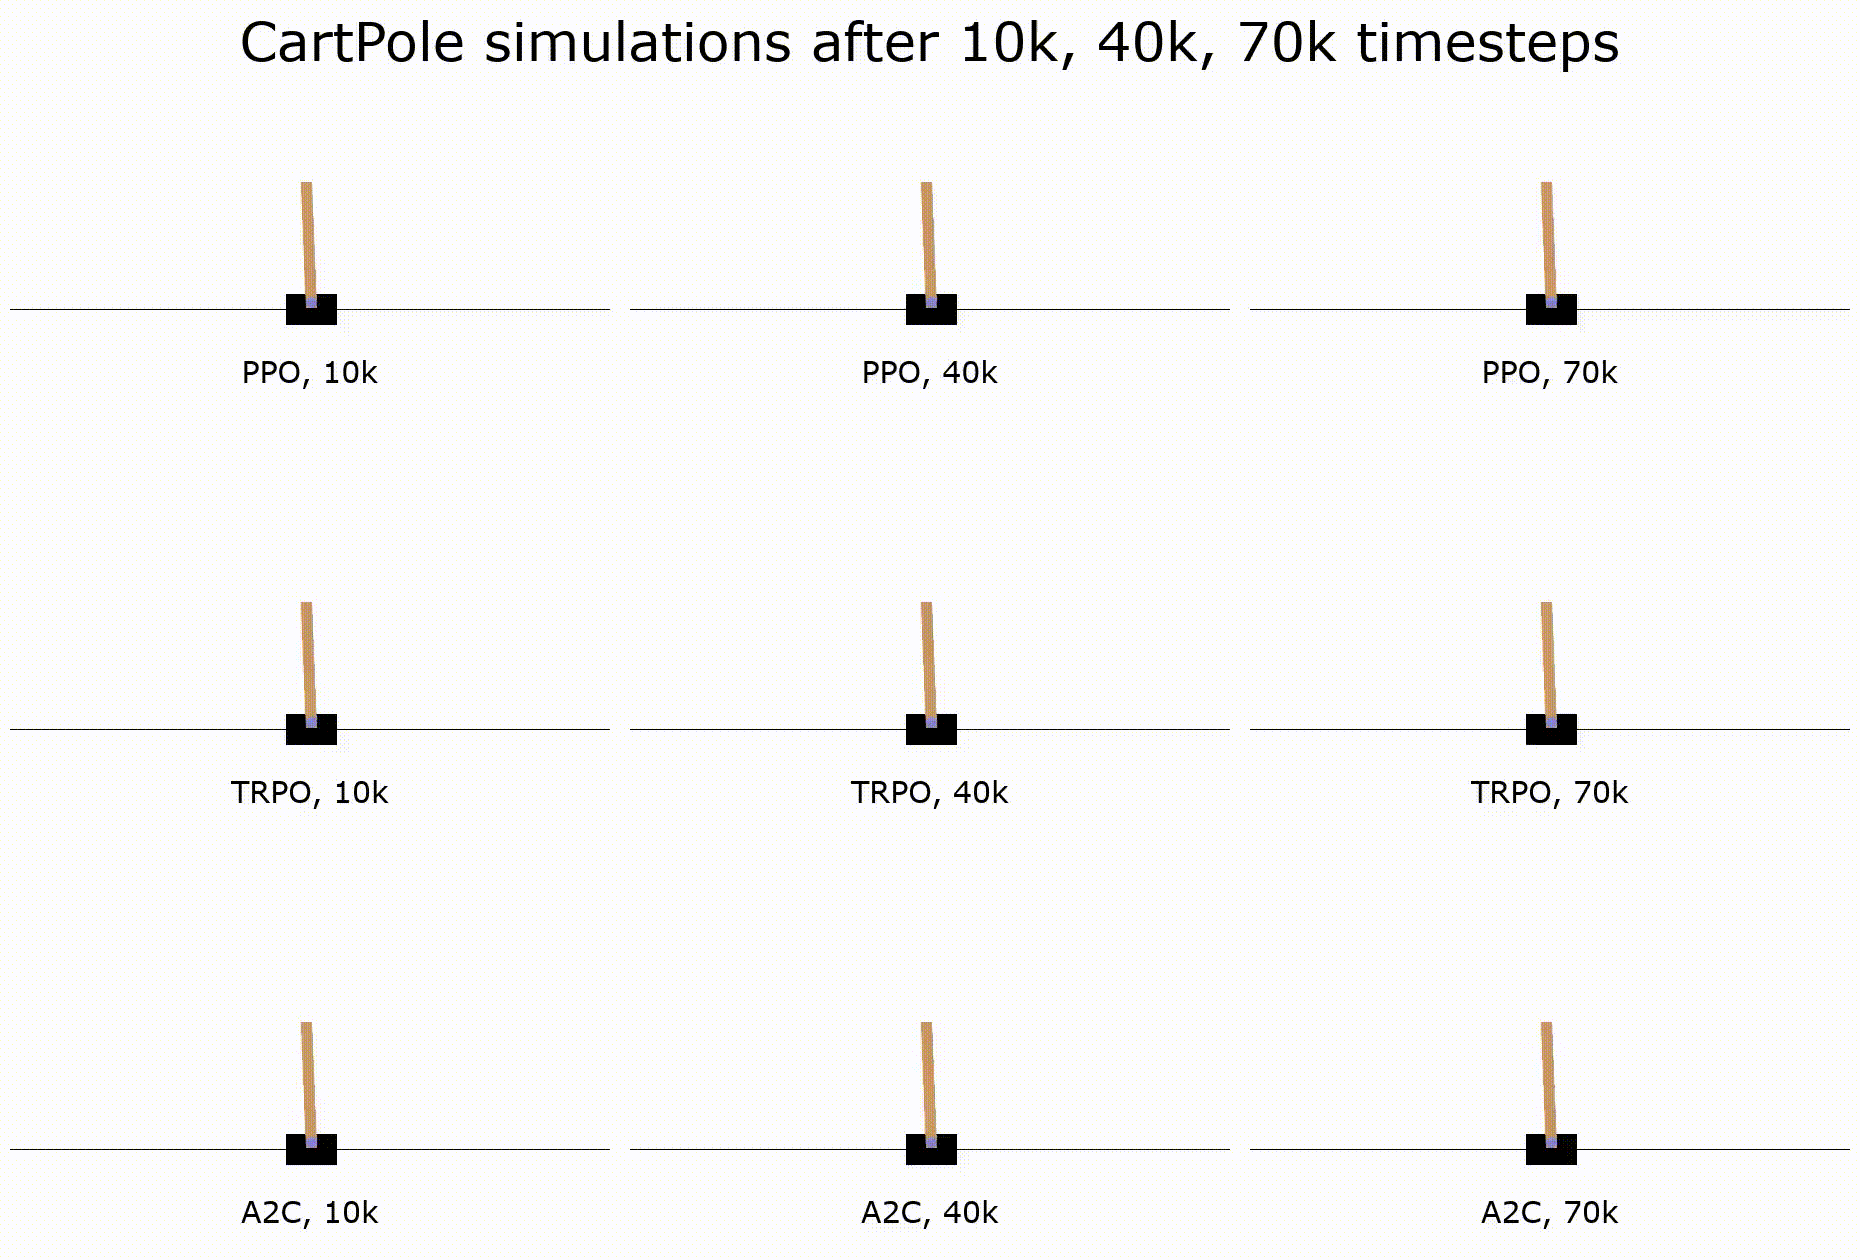

In [19]:
# Display the GIF inline
Image(filename="CartPole_simulations.gif")


## HalfCheetah-v4, MuJoCo game

### to run training jobs with checkpoints

Example for PPO:
- ```python train.py --algo ppo --env HalfCheetah-v4 --n-timesteps 1000000 --save-freq 100000```

To record and save videos of best model, final model, checkpoint models:
- ```python -m rl_zoo3.record_training --algo ppo --env HalfCheetah-v4 -n 1000 -f logs --deterministic```

In [51]:
# Function to load and combine monitor files

def load_and_combine_monitor_files(file_paths):
    combined_data = pd.concat(
        [pd.read_csv(file, skiprows=1) for file in file_paths], ignore_index=True
    )
    return combined_data

# Function to process monitor data for 100000 timesteps
def process_monitor_data(data, total_timesteps=100000, window = 20):  # Adjust total_timesteps for HalfCheetah
    # Sort by timesteps
    data.sort_values("t", inplace=True)

    # Calculate cumulative timesteps
    data["cumulative_timesteps"] = np.cumsum(data["l"])

    # Filter to only include timesteps <= total_timesteps
    data = data[data["cumulative_timesteps"] <= total_timesteps]

    # Smooth rewards using a rolling mean
    data["smoothed_reward"] = data["r"].rolling(window=window, min_periods=1).mean()

    return data


### halfCheetah, 100 000 timesteps

In [ ]:

# Paths to monitor files
ppo_file = "./logs/ppo/HalfCheetah-v4_4/0.monitor.csv"
a2c_file = "./logs/a2c/HalfCheetah-v4_3/0.monitor.csv"
trpo_files = [
    "./logs/trpo/HalfCheetah-v4_3/0.monitor.csv",
    "./logs/trpo/HalfCheetah-v4_3/1.monitor.csv"
]

# Load and process data
ppo_data = process_monitor_data(pd.read_csv(ppo_file, skiprows=1))
a2c_data = process_monitor_data(pd.read_csv(a2c_file, skiprows=1))
trpo_data = process_monitor_data(load_and_combine_monitor_files(trpo_files))


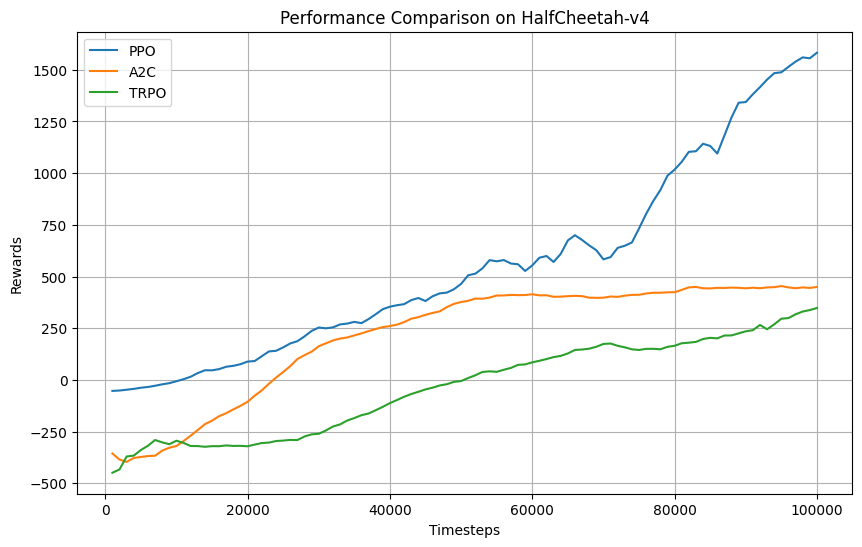

In [54]:

# Plot rewards over timesteps
plt.figure(figsize=(10, 6))

# PPO
plt.plot(ppo_data["cumulative_timesteps"], ppo_data["smoothed_reward"], label="PPO")

# A2C
plt.plot(a2c_data["cumulative_timesteps"], a2c_data["smoothed_reward"], label="A2C")

# TRPO
plt.plot(trpo_data["cumulative_timesteps"], trpo_data["smoothed_reward"], label="TRPO")

# Labels and legend
plt.xlabel("Timesteps")
plt.ylabel("Rewards")
plt.title("Performance Comparison on HalfCheetah-v4")
plt.legend()
plt.grid()
plt.show()

### halfCheetah, 1 000 000 timesteps

In [58]:


ppo_file = "./logs/ppo/HalfCheetah-v4_4/0.monitor.csv"
a2c_file = "./logs/a2c/HalfCheetah-v4_3/0.monitor.csv"
trpo_files = [
    "./logs/trpo/HalfCheetah-v4_3/0.monitor.csv",
    "./logs/trpo/HalfCheetah-v4_3/1.monitor.csv"
]


# Load and process data
ppo_data = process_monitor_data(pd.read_csv(ppo_file, skiprows=1), total_timesteps=1000000, window=200)
a2c_data = process_monitor_data(pd.read_csv(a2c_file, skiprows=1), total_timesteps=1000000, window=200)
trpo_data = process_monitor_data(load_and_combine_monitor_files(trpo_files), total_timesteps=1000000, window=200)



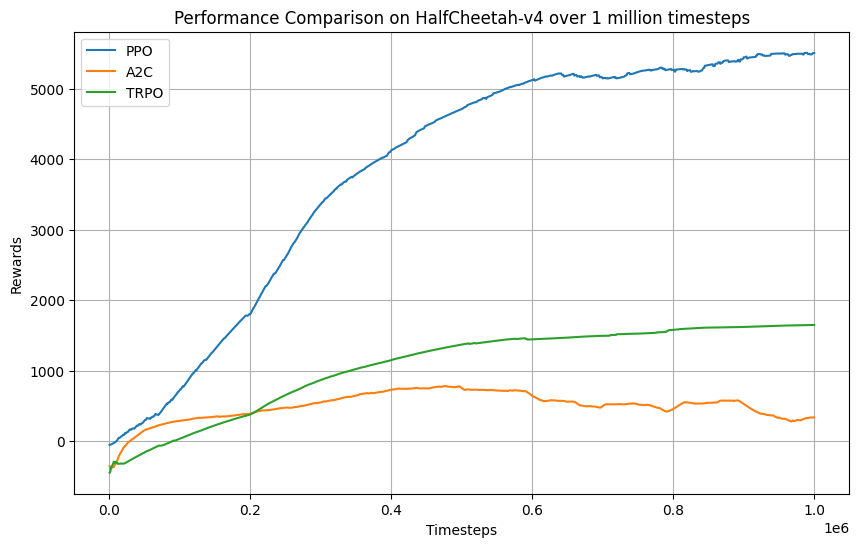

In [59]:

# Plot rewards over timesteps
plt.figure(figsize=(10, 6))

# PPO
plt.plot(ppo_data["cumulative_timesteps"], ppo_data["smoothed_reward"], label="PPO")

# A2C
plt.plot(a2c_data["cumulative_timesteps"], a2c_data["smoothed_reward"], label="A2C")

# TRPO
plt.plot(trpo_data["cumulative_timesteps"], trpo_data["smoothed_reward"], label="TRPO")

# Labels and legend
plt.xlabel("Timesteps")
plt.ylabel("Rewards")
plt.title("Performance Comparison on HalfCheetah-v4 over 1 million timesteps")
plt.legend()
plt.grid()
plt.show()

### videos for halfCheetah

In [ ]:
# Define input video paths and their subtitles
path = "logs"
methods = ["ppo", "trpo", "a2c"]
# timesteps = [10000, 40000, 70000]
index = [4, 3, 3]
videos = []



for i, method in enumerate(methods):
    # for timestep in timesteps:
    video_path = f"{path}/{method}/HalfCheetah-v4_{index[i]}/videos/best-model-{method}-HalfCheetah-v4-step-0-to-step-1000.mp4"
    subtitle = f"{method.upper()}"
    print(video_path, "\n", subtitle)
    videos.append({"path" : video_path, "subtitle": subtitle})



logs/ppo/HalfCheetah-v4_4/videos/best-model-ppo-HalfCheetah-v4-step-0-to-step-1000.mp4 
 PPO
logs/trpo/HalfCheetah-v4_3/videos/best-model-trpo-HalfCheetah-v4-step-0-to-step-1000.mp4 
 TRPO
logs/a2c/HalfCheetah-v4_3/videos/best-model-a2c-HalfCheetah-v4-step-0-to-step-1000.mp4 
 A2C


In [ ]:
output_videos = []
for i, video in enumerate(videos):
    output_path = f"temp_with_subtitle_{i + 1}.mp4"
    # Add subtitles outside the frame
    video_with_subtitle = ffmpeg.input(video["path"], t=8).filter(
        "pad", width="iw", height="ih+50", x=0, y=0, color="white"
    ).filter(
        "drawtext",
        text=video["subtitle"],
        fontfile="/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf",  # Adjust to your system's font file path
        fontsize=30,
        fontcolor="black",
        x="(w-text_w)/2",
        y="h-40",
        box=1,
        boxcolor="white",
    )
    # Add padding around the video
    padded_video = video_with_subtitle.filter(
        "pad", width="iw+20", height="ih+20", x=10, y=10, color="white"
    ).output(output_path)
    padded_video.run(overwrite_output=True)
    output_videos.append(output_path)

# Arrange videos in a row with spacing
grid_output = "final_output.mp4"
ffmpeg.filter(
    [ffmpeg.input(v) for v in output_videos],
    "xstack",
    inputs=3,
    layout="0_0|w0_0|w0+w1_0"
).filter(
    "pad", width="iw", x=0, y=40, color="white"  # Add space for the title
).filter(
    "drawtext",
    text="HalfCheetah best model simulations",
    fontfile="/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf",
    fontsize=54,
    fontcolor="black",
    x="(w-text_w)/2",
    y="30",
    box=1,
    boxcolor="white",
    boxborderw=10,
).output(grid_output).run(overwrite_output=True)

# Convert to GIF
gif_output = "output.gif"
ffmpeg.input(grid_output).output(gif_output, vf="fps=15", loop=0).run(overwrite_output=True)

print("GIF created as output.gif")

In [ ]:
# Display the GIF inline
Image(filename="HalfCheetah_simulations.gif")

### videos for PPO at diff timesteps

In [ ]:
# Define input video paths and their subtitles
path = "logs/ppo/HalfCheetah-v4_4/videos"
timesteps = [100000, 400000, 700000]
videos = []
method = "PPO"


for timestep in timesteps:
    video_path = f"{path}/checkpoint-{timestep}-ppo-HalfCheetah-v4-step-0-to-step-1000.mp4"
    subtitle = f"{method.upper()}, {timestep // 1_000}k"
    print(video_path, "\n", subtitle)
    videos.append({"path" : video_path, "subtitle": subtitle})

logs/ppo/HalfCheetah-v4_4/videos/checkpoint-100000-ppo-HalfCheetah-v4-step-0-to-step-1000.mp4 
 PPO, 100k
logs/ppo/HalfCheetah-v4_4/videos/checkpoint-400000-ppo-HalfCheetah-v4-step-0-to-step-1000.mp4 
 PPO, 400k
logs/ppo/HalfCheetah-v4_4/videos/checkpoint-700000-ppo-HalfCheetah-v4-step-0-to-step-1000.mp4 
 PPO, 700k


In [ ]:
output_videos = []
for i, video in enumerate(videos):
    output_path = f"temp_with_subtitle_{i + 1}.mp4"
    # Add subtitles outside the frame
    video_with_subtitle = ffmpeg.input(video["path"], t=8).filter(
        "pad", width="iw", height="ih+50", x=0, y=0, color="white"
    ).filter(
        "drawtext",
        text=video["subtitle"],
        fontfile="/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf",  # Adjust to your system's font file path
        fontsize=30,
        fontcolor="black",
        x="(w-text_w)/2",
        y="h-40",
        box=1,
        boxcolor="white",
    )
    # Add padding around the video
    padded_video = video_with_subtitle.filter(
        "pad", width="iw+20", height="ih+20", x=10, y=10, color="white"
    ).output(output_path)
    padded_video.run(overwrite_output=True)
    output_videos.append(output_path)

# Arrange videos in a row with spacing
grid_output = "final_output.mp4"
ffmpeg.filter(
    [ffmpeg.input(v) for v in output_videos],
    "xstack",
    inputs=3,
    layout="0_0|w0_0|w0+w1_0"
).filter(
    "pad", width="iw", x=0, y=40, color="white"  # Add space for the title
).filter(
    "drawtext",
    text="HalfCheetah PPO agent at different timesteps",
    fontfile="/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf",
    fontsize=54,
    fontcolor="black",
    x="(w-text_w)/2",
    y="30",
    box=1,
    boxcolor="white",
    boxborderw=10,
).output(grid_output).run(overwrite_output=True)

# Convert to GIF
gif_output = "HalfCheetah_ppo_simulations.gif"
ffmpeg.input(grid_output).output(gif_output, vf="fps=15", loop=0).run(overwrite_output=True)

print("GIF created as output.gif")

In [ ]:
# Display the GIF inline
Image(filename="HalfCheetah_ppo_simulations.gif")
